In [115]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
from __future__ import division
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from patsy import dmatrices
import matplotlib.pyplot as plt
import matplotlib
import string
import re
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 15})

> Import data

In [116]:
with open("movie_data_02.pkl", 'r') as picklefile: 
    df = pickle.load(picklefile)

> Add studio variable

In [117]:
df.rename(columns={'Sci-Fi': 'Sci_Fi'}, inplace=True)
df.head()

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,Horror,Music,Musical,Mystery,Romance,Sci_Fi,Sport,Thriller,War,Western
/title/tt0035423/,USA,James Mangold,118,47095453,English,Meg Ryan,44,311,59283,2562448.0,...,0,0,0,0,1,0,0,0,0,0
/title/tt0118589/,USA,Vondie Curtis-Hall,104,4273372,English,Mariah Carey,14,305,18755,2414596.0,...,0,1,0,0,1,0,0,0,0,0
/title/tt0118694/,Hong Kong,Kar Wai Wong,98,2734044,Cantonese,Tony Chiu Wai Leung,85,342,66416,138340.5,...,0,0,0,0,1,0,0,0,0,0
/title/tt0118926/,Spain,John Malkovich,132,2377348,English,Javier Bardem,64,71,5333,92433.0,...,0,0,0,0,0,0,0,1,0,0
/title/tt0120202/,France,David Mamet,105,6920692,English,Philip Seymour Hoffman,75,169,17670,580163.0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
studio = df['studio'].str.get_dummies()
studio.head()

,"""DIA"" Productions GmbH & Co. KG",10th Hole Productions,120 Films,120dB Films,13th Night Productions,1492 Pictures,19 Entertainment,1984 Private Defense Contractors,2 Loop Films,2-Team Productions,...,Zero Pictures Co.,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,iDeal Partners Film Fund,micro_scope,nWave Pictures
/title/tt0035423/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
for name in studio.columns:
    name_as_list = name.split()
    new_list = []
    for word in name_as_list:
        word = re.sub("[^a-z0-9]", "", word.lower())
        new_list.append(word)
    new_name = 'X_' + '_'.join(new_list)
    studio.rename(columns={name: new_name}, inplace=True)

studio.head()

,X_dia_productions_gmbh__co_kg,X_10th_hole_productions,X_120_films,X_120db_films,X_13th_night_productions,X_1492_pictures,X_19_entertainment,X_1984_private_defense_contractors,X_2_loop_films,X_2team_productions,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
/title/tt0035423/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
df_studio = df.join(studio)

In [121]:
df_studio.head()

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
/title/tt0035423/,USA,James Mangold,118,47095453,English,Meg Ryan,44,311,59283,2562448.0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,USA,Vondie Curtis-Hall,104,4273372,English,Mariah Carey,14,305,18755,2414596.0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,Hong Kong,Kar Wai Wong,98,2734044,Cantonese,Tony Chiu Wai Leung,85,342,66416,138340.5,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,Spain,John Malkovich,132,2377348,English,Javier Bardem,64,71,5333,92433.0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,France,David Mamet,105,6920692,English,Philip Seymour Hoffman,75,169,17670,580163.0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df_studio['director'] = df_studio['director'].map(lambda x: '_'.join(x.split()))

> Re-index by title

In [123]:
df_studio = df_studio.set_index('title')

In [124]:
df_studio.head()

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
Kate & Leopold,USA,James_Mangold,118,47095453,English,Meg Ryan,44,311,59283,2562448.0,...,0,0,0,0,0,0,0,0,0,0
Glitter,USA,Vondie_Curtis-Hall,104,4273372,English,Mariah Carey,14,305,18755,2414596.0,...,0,0,0,0,0,0,0,0,0,0
In the Mood for Love,Hong Kong,Kar_Wai_Wong,98,2734044,Cantonese,Tony Chiu Wai Leung,85,342,66416,138340.5,...,0,0,0,0,0,0,0,0,0,0
The Dancer Upstairs,Spain,John_Malkovich,132,2377348,English,Javier Bardem,64,71,5333,92433.0,...,0,0,0,0,0,0,0,0,0,0
State and Main,France,David_Mamet,105,6920692,English,Philip Seymour Hoffman,75,169,17670,580163.0,...,0,0,0,0,0,0,0,0,0,0


> Test and train split

In [125]:
test = df_studio[df_studio['release'] >= '2011-01-01 00:00:00']
train = df_studio[df_studio['release'] < '2011-01-01 00:00:00']

print len(train), len(test)
print len(test) / (len(train) + len(test))

2745 1033
0.273425092642


## Investigate numerical variables

Month

In [126]:
monthly = train.groupby(['month'])['metacritic'].mean()

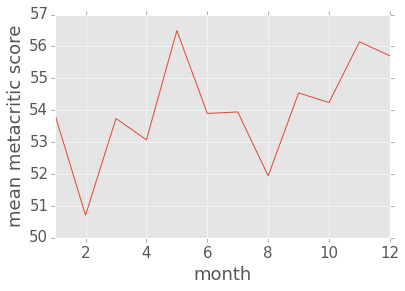

In [127]:
monthly.plot(x='month', y='metacritic')
plt.ylabel('mean metacritic score')

> Reset y-axis to start at 0

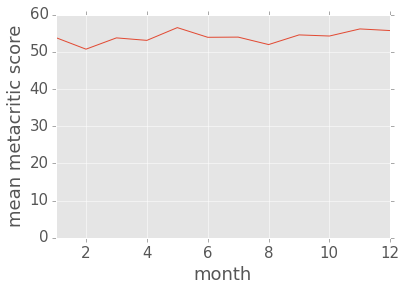

In [128]:
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,60))

monthly.plot(x='month', y='metacritic')
plt.ylabel('mean metacritic score')

In [129]:
monthly

month
1     53.843220
2     50.710000
3     53.741803
4     53.072034
5     56.500000
6     53.898936
7     53.948276
8     51.943089
9     54.541958
10    54.242958
11    56.147826
12    55.706161
Name: metacritic, dtype: float64

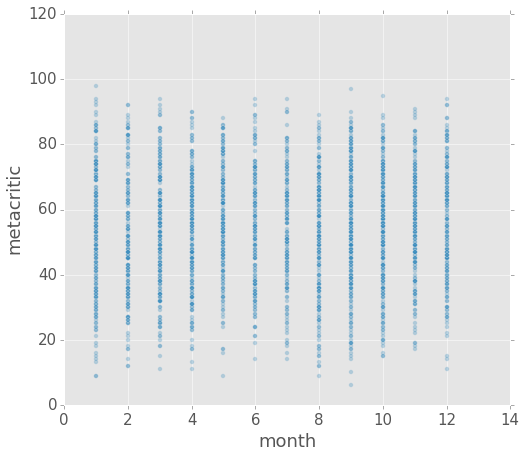

In [130]:
train.plot(kind='scatter', x='month', y='metacritic', alpha=0.3, figsize = (8,7))

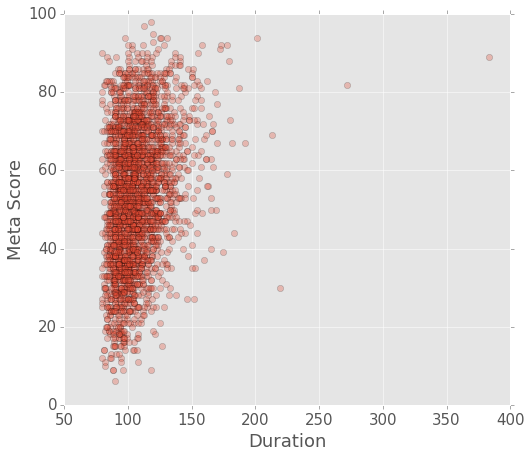

In [131]:
plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()

duration = train['duration']
y = train['metacritic']

plt.plot(duration, y, 'o', alpha=0.3)
plt.xlabel('Duration')
plt.ylabel('Meta Score')


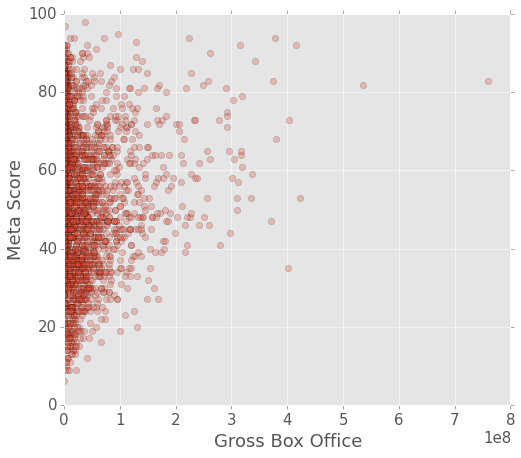

In [132]:
plt.figure(figsize = (8,7))
gross = train['gross']

plt.plot(gross, y, 'o', alpha=0.3)
plt.xlabel('Gross Box Office')
plt.ylabel('Meta Score')

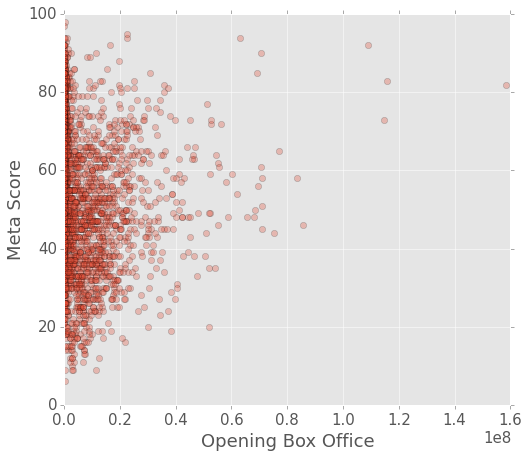

In [133]:
plt.figure(figsize = (8,7))
opening = train['opening']

plt.plot(opening, y, 'o', alpha=0.3)
plt.xlabel('Opening Box Office')
plt.ylabel('Meta Score')

## Investigate and transform categorical variables
Production studios

In [134]:
groupby_studios = train.groupby(['studio'])

studios_freq = groupby_studios.filter(lambda x: len(x) > 9)
top_studios = studios_freq.groupby(['studio']).size().order(ascending=False)[:20]

pro_studios = top_studios.index


def transform_names(series):
    """
    Transforms the studio names to new column names.
    Returns strings of studio names separated by '+' 
    for use in regression function.
    """
    series_new = []
    for name in series:
        name_as_list = name.split()
        new_list = []
        for word in name_as_list:
            word = re.sub("[^a-z0-9]", "", word.lower())
            new_list.append(word)
        new_name = 'X_' + '_'.join(new_list)
        series_new.append(new_name)
        series_str = ' + '.join(series_new)
    return str(series_str)


pro_studios_str = transform_names(pro_studios)

pro_studios_str

'X_universal_pictures + X_warner_bros + X_paramount_pictures + X_twentieth_century_fox_film_corporation + X_new_line_cinema + X_columbia_pictures_corporation + X_touchstone_pictures + X_dreamworks_skg + X_columbia_pictures + X_metrogoldwynmayer_mgm + X_walt_disney_pictures + X_miramax + X_fox_searchlight_pictures + X_revolution_studios + X_dimension_films + X_screen_gems + X_fox_2000_pictures + X_focus_features + X_lionsgate + X_lions_gate_films'

In [135]:
train.sort(['metacritic'], ascending=False)[:10]

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
Pan's Labyrinth,Spain,Guillermo_del_Toro,118,37623143,Spanish,Ivana Baquero,98,1056,413099,501691.0,...,0,0,0,0,0,0,0,0,0,0
"4 Months, 3 Weeks and 2 Days",Romania,Cristian_Mungiu,113,1185783,Romanian,Anamaria Marinca,97,171,42166,51712.0,...,0,0,0,0,0,0,0,0,0,0
The Social Network,USA,David_Fincher,120,96917897,English,Jesse Eisenberg,95,677,420702,22445653.0,...,0,0,0,0,0,0,0,0,0,0
The Hurt Locker,USA,Kathryn_Bigelow,131,17017811,English,Jeremy Renner,94,843,294491,145352.0,...,0,0,0,0,0,0,0,0,0,0
Spirited Away,Japan,Hayao_Miyazaki,125,10049886,Japanese,Daveigh Chase,94,845,353360,1052197.0,...,0,0,0,0,0,0,0,0,0,0
The Lord of the Rings: The Return of the King,USA,Peter_Jackson,201,377845905,English,Elijah Wood,94,3124,1064729,22532641.5,...,0,0,0,0,0,0,0,0,0,0
Sideways,USA,Alexander_Payne,126,71502303,English,Paul Giamatti,94,825,139356,207042.0,...,0,0,0,0,0,0,0,0,0,0
WALL·E,USA,Andrew_Stanton,98,223808164,English,Ben Burtt,94,1022,611575,63087526.0,...,0,0,0,0,0,0,0,0,0,0
"Crouching Tiger, Hidden Dragon",Taiwan,Ang_Lee,120,128067808,Mandarin,Yun-Fat Chow,93,1632,203579,663205.0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
studio_meta = train.groupby(['studio'])['user_score'].mean()
studio_meta.sort(ascending=False)
studio_meta.index[:20]

Index([                        u'Tokuma Shoten',
             u'Wiedemann & Berg Filmproduktion',
                                   u'BiBi Film',
                  u'Claudie Ossard Productions',
                                   u'Egg Films',
           u'Yash Raj Films International Ltd.',
                                    u'Dreamlab',
                          u'Matten Productions',
              u'Buena Vista Home Entertainment',
                              u'Korea Pictures',
                                   u'AtomFilms',
                    u'Amuse Soft Entertainment',
                             u'Kim Ki-Duk Film',
                                    u'Ren Film',
                            u'Liberty Films UK',
                 u'Lawrence Bender Productions',
       u'Majid Majidi Film Production (I) (II)',
                                        u'EFTI',
                             u'Noé Productions',
                          u'Dharma Productions'],
      dtype='object

In [137]:
studios_freq.groupby(['studio'])['metacritic'].mean().order(ascending=False)[:20]

studio
Focus Features                   68.304348
BBC Films                        65.214286
Canal+                           63.470588
Fox Searchlight Pictures         63.388889
United Artists                   60.750000
Miramax                          57.842105
DreamWorks SKG                   55.326087
EuropaCorp                       54.400000
Columbia Pictures                54.244444
Universal Pictures               53.780488
Walt Disney Pictures             52.651163
Paramount Pictures               51.584270
Millennium Films                 51.200000
Warner Bros.                     50.705882
Alcon Entertainment              50.166667
Weinstein Company, The           50.071429
Touchstone Pictures              49.943396
Lions Gate Films                 49.842105
New Line Cinema                  49.089744
Columbia Pictures Corporation    47.380952
Name: metacritic, dtype: float64

In [138]:
train[train['studio'] == 'HBO Films']

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
Real Women Have Curves,USA,Patricia_Cardoso,90,5844929,English,America Ferrera,71,109,5813,183772,...,0,0,0,0,0,0,0,0,0,0
Elephant,USA,Gus_Van_Sant,81,1227000,English,Elias McConnell,70,684,66666,1229210,...,0,0,0,0,0,0,0,0,0,0
Maria Full of Grace,Colombia,Joshua_Marston,101,6517198,Spanish,Catalina Sandino Moreno,87,169,29272,139066,...,0,0,0,0,0,0,0,0,0,0
Last Days,USA,Gus_Van_Sant,97,454711,English,Michael Pitt,67,266,18036,306933,...,0,0,0,0,0,0,0,0,0,0
The Notorious Bettie Page,USA,Mary_Harron,91,1410778,English,Gretchen Mol,64,97,8610,143131,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# create string of studios w/ highest mean meta scores from training set 
# for input in regression model

highmeta = studios_freq.groupby(['studio'])['metacritic'].mean().order(ascending=False)

highmeta_studios = highmeta[:20].index

highmeta_studios_str = transform_names(highmeta_studios)

highmeta_studios_str

'X_focus_features + X_bbc_films + X_canal + X_fox_searchlight_pictures + X_united_artists + X_miramax + X_dreamworks_skg + X_europacorp + X_columbia_pictures + X_universal_pictures + X_walt_disney_pictures + X_paramount_pictures + X_millennium_films + X_warner_bros + X_alcon_entertainment + X_weinstein_company_the + X_touchstone_pictures + X_lions_gate_films + X_new_line_cinema + X_columbia_pictures_corporation'

In [140]:
# create string of genres for input in regression model

genre_names = train.iloc[:,15:35].columns

genres_str = ' + '.join(genre_names)

genres_str

'Action + Adventure + Animation + Biography + Comedy + Crime + Drama + Family + Fantasy + History + Horror + Music + Musical + Mystery + Romance + Sci_Fi + Sport + Thriller + War + Western'

> Build first model using duration, gross, opening, rating, and month

In [141]:
# basic feature variables for regression model

dependent = 'metacritic ~ '

basic = 'duration + gross + opening + rating + num_users + num_reviews'

In [142]:
y, X = dmatrices(dependent + basic, 
                 data=train, return_type='dataframe')

In [143]:
model1 = sm.OLS(y, X)
results1 = model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     76.82
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          3.38e-139
Time:                        20:20:40   Log-Likelihood:                -11414.
No. Observations:                2745   AIC:                         2.285e+04
Df Residuals:                    2734   BIC:                         2.291e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            34.2426      3.212     10.660      0.000        27.944    40.541
rating[T.NC-17]       2.8643      5.864      0.489      0.625        -8.633    14.362
rating[T.PG]         -5.7776      2.852     -2.026      0.043       -11.371    -0.185
rating[T.PG-13]      -8.2617      2.771     -2.982      0.003       -13.695    -2.829
rating[T.R]          -2.6550      2.788     -0.952      0.341        -8.122     2.812
rating[T.UNRATED]     9.1176      2.946      3.095      0.002         3.341    14.894
duration              0.2137      0.018     12.120      0.000         0.179     0.248
gross             -1.862e-08   1.01e-08     -1.853      0.064     -3.83e-08  1.09e-09
opening           -1.996e-07   3.58e-08     -5.569      0.000      -2.7e-07 -1.29e-07
num_users          6.232e-05   5.32e-06     11.717      0.000      5.19e-05  7.28e-05
num_reviews          -0.0044      0.001     -3.085      0.002        -0.007    -0.002
==============================================================================
Omnibus:                       38.628   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.659
Skew:                          -0.080   Prob(JB):                     4.42e-06
Kurtosis:                       2.564   Cond. No.                     1.61e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
y_test, X_test = dmatrices(dependent + basic, 
                           data=test, return_type='dataframe')

predict1 = results1.predict(X_test)

In [145]:
def test_rsqr(true_y, predictions):
    y = true_y.metacritic.values
    p = predictions
    rsqr = 1 - np.var(y-p) / np.var(y)
    return rsqr

In [146]:
test_rsqr(y_test, predict1)

0.17745537249108578

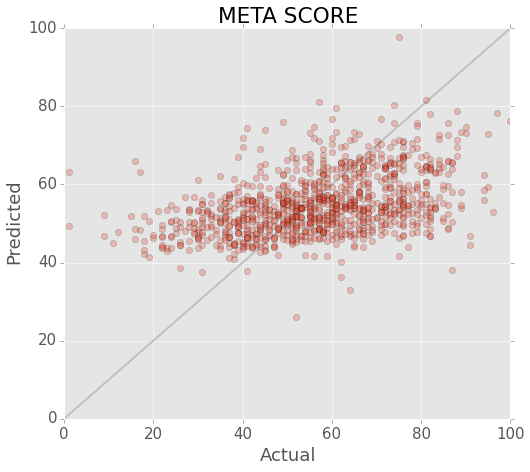

In [147]:
plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot([0, 100], [0, 100], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict1, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('META SCORE')

> Add genre columns and build another model

In [148]:
y2, X2 = dmatrices(dependent + basic + ' + ' + genres_str, 
                 data=train, return_type='dataframe')

In [149]:
model2 = sm.OLS(y2, X2)
results2 = model2.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     46.67
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          1.81e-219
Time:                        20:22:50   Log-Likelihood:                -11183.
No. Observations:                2745   AIC:                         2.243e+04
Df Residuals:                    2714   BIC:                         2.261e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            38.6681      3.494     11.068      0.000        31.817    45.519
rating[T.NC-17]       6.1096      5.586      1.094      0.274        -4.843    17.062
rating[T.PG]         -2.1508      2.731     -0.788      0.431        -7.506     3.205
rating[T.PG-13]      -2.9537      2.874     -1.028      0.304        -8.590     2.683
rating[T.R]           2.2030      2.897      0.760      0.447        -3.477     7.883
rating[T.UNRATED]    11.6224      3.013      3.857      0.000         5.714    17.531
duration              0.1052      0.018      5.839      0.000         0.070     0.140
gross             -3.225e-09   9.59e-09     -0.336      0.737      -2.2e-08  1.56e-08
opening           -1.196e-07   3.38e-08     -3.541      0.000     -1.86e-07 -5.34e-08
num_users          5.928e-05   4.99e-06     11.886      0.000      4.95e-05  6.91e-05
num_reviews          -0.0010      0.001     -0.712      0.476        -0.004     0.002
Action               -6.0658      0.915     -6.631      0.000        -7.860    -4.272
Adventure            -0.0874      1.037     -0.084      0.933        -2.121     1.946
Animation            10.2557      2.228      4.603      0.000         5.887    14.624
Biography             2.0012      1.242      1.612      0.107        -0.433     4.436
Comedy               -2.5502      0.762     -3.347      0.001        -4.044    -1.056
Crime                -2.2336      0.817     -2.733      0.006        -3.836    -0.631
Drama                 8.2932      0.784     10.573      0.000         6.755     9.831
Family                0.2301      1.524      0.151      0.880        -2.758     3.218
Fantasy              -3.0705      1.215     -2.526      0.012        -5.454    -0.687
History               1.8326      1.726      1.062      0.288        -1.552     5.218
Horror               -8.2508      1.264     -6.526      0.000       -10.730    -5.772
Music                -1.0251      1.392     -0.736      0.462        -3.755     1.705
Musical              -1.7424      2.270     -0.768      0.443        -6.193     2.708
Mystery              -3.0537      1.047     -2.916      0.004        -5.107    -1.000
Romance              -2.3754      0.739     -3.213      0.001        -3.825    -0.926
Sci_Fi               -3.1725      1.378     -2.302      0.021        -5.875    -0.470
Sport                -2.3606      1.631     -1.448      0.148        -5.558     0.837
Thriller             -2.1266      0.922     -2.307      0.021        -3.934    -0.319
War                   1.8843      1.834      1.027      0.304        -1.712     5.481
Western               4.2584      4.362      0.976      0.329        -4.295    12.812
==============================================================================
Omnibus:                       22.151   Durbin-Watson:                   2.026
P

In [150]:
y_test, X_test = dmatrices(dependent + basic + ' + ' + genres_str, 
                           data=test, return_type='dataframe')

predict2 = results2.predict(X_test)

In [151]:
test_rsqr(y_test, predict2)

0.30716100860078532

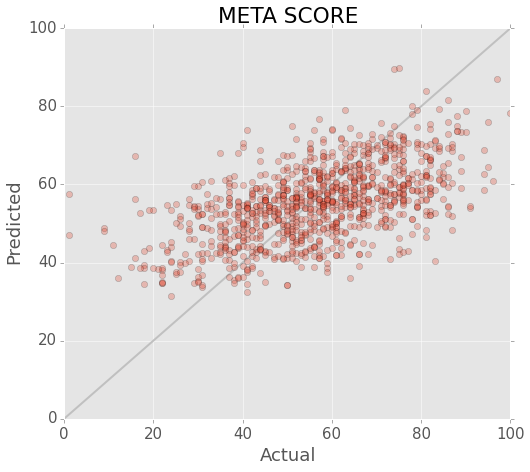

In [152]:
plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot([0, 100], [0, 100], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict2, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('META SCORE')

In [153]:
formula = dependent + basic + '+' + genres_str + '+' + highmeta_studios_str

In [154]:
y3, X3 = dmatrices(formula, data=train, return_type='dataframe')

model3 = sm.OLS(y3, X3)
results3 = model3.fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     29.57
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          5.08e-216
Time:                        20:22:54   Log-Likelihood:                -11153.
No. Observations:                2745   AIC:                         2.241e+04
Df Residuals:                    2694   BIC:                         2.271e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                          37.8646      3.536     10.707      0.000        30.930    44.799
rating[T.NC-17]                     6.3144      5.584      1.131      0.258        -4.636    17.265
rating[T.PG]                       -1.6007      2.773     -0.577      0.564        -7.039     3.837
rating[T.PG-13]                    -2.4337      2.947     -0.826      0.409        -8.211     3.344
rating[T.R]                         2.4434      2.956      0.827      0.409        -3.353     8.240
rating[T.UNRATED]                  11.8336      3.068      3.858      0.000         5.819    17.849
duration                            0.1104      0.018      6.129      0.000         0.075     0.146
gross                           -1.485e-09   9.66e-09     -0.154      0.878     -2.04e-08  1.75e-08
opening                         -1.099e-07   3.44e-08     -3.197      0.001     -1.77e-07 -4.25e-08
num_users                        6.018e-05      5e-06     12.045      0.000      5.04e-05     7e-05
num_reviews                        -0.0011      0.001     -0.796      0.426        -0.004     0.002
Action                             -6.1147      0.914     -6.693      0.000        -7.906    -4.323
Adventure                           0.1564      1.039      0.150      0.880        -1.882     2.195
Animation                           9.9070      2.222      4.459      0.000         5.550    14.264
Biography                           1.6205      1.239      1.308      0.191        -0.809     4.050
Comedy                             -2.6903      0.761     -3.536      0.000        -4.182    -1.198
Crime                              -1.8887      0.818     -2.308      0.021        -3.493    -0.284
Drama                               8.1955      0.785     10.438      0.000         6.656     9.735
Family                              0.2747      1.528      0.180      0.857        -2.722     3.271
Fantasy                            -3.0686      1.213     -2.530      0.011        -5.447    -0.690
History                             1.9292      1.720      1.122      0.262        -1.443     5.302
Horror                             -7.7329      1.265     -6.113      0.000       -10.213    -5.253
Music                              -1.1944      1.387     -0.861      0.389        -3.915     1.526
Musical                            -1.5675      2.259     -0.694      0.488        -5.996     2.861
Mystery                            -3.3960      1.045     -3.249      0.001        -5.446    -1.346
Romance                            -2.4782      0.738     -3.359      0.001        -3.925    -1.032
Sci_Fi                             -3.1237      1.376     -2.270      0.023        -5.822    -0.425
Sport                              -2.3456      1.624     -1.444      0.149        

In [155]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict3 = results3.predict(X_test)

In [156]:
test_rsqr(y_test, predict3)

0.30950364386989182

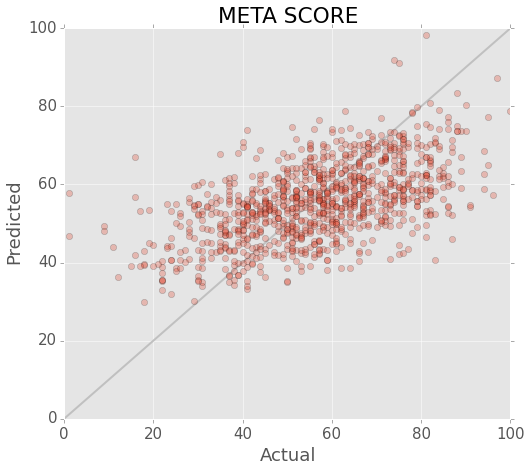

In [157]:
plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot([0, 100], [0, 100], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict3, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('META SCORE')

In [158]:
formula = (dependent + basic + '+' + genres_str + '+' + highmeta_studios_str +
           '+' + pro_studios_str)

In [159]:
y4, X4 = dmatrices(formula, data=train, return_type='dataframe')

In [160]:
model4 = sm.OLS(y4, X4)
results4 = model4.fit()

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     27.19
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          5.32e-221
Time:                        20:22:58   Log-Likelihood:                -11129.
No. Observations:                2745   AIC:                         2.237e+04
Df Residuals:                    2687   BIC:                         2.272e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                   38.0835      3.512     10.844      0.000        31.197    44.970
rating[T.NC-17]                              6.3687      5.543      1.149      0.251        -4.501    17.238
rating[T.PG]                                -0.5758      2.758     -0.209      0.835        -5.983     4.831
rating[T.PG-13]                             -1.1914      2.933     -0.406      0.685        -6.942     4.559
rating[T.R]                                  3.0270      2.937      1.031      0.303        -2.732     8.786
rating[T.UNRATED]                           11.9473      3.047      3.922      0.000         5.973    17.921
duration                                     0.1087      0.018      6.071      0.000         0.074     0.144
gross                                     1.902e-09   9.63e-09      0.198      0.843      -1.7e-08  2.08e-08
opening                                  -8.276e-08   3.44e-08     -2.406      0.016      -1.5e-07 -1.53e-08
num_users                                 5.953e-05   4.96e-06     11.998      0.000      4.98e-05  6.93e-05
num_reviews                                 -0.0010      0.001     -0.739      0.460        -0.004     0.002
Action                                      -6.0645      0.909     -6.670      0.000        -7.847    -4.282
Adventure                                    0.2579      1.034      0.249      0.803        -1.770     2.285
Animation                                    9.4528      2.208      4.280      0.000         5.123    13.783
Biography                                    1.6255      1.230      1.321      0.186        -0.787     4.038
Comedy                                      -2.5366      0.757     -3.353      0.001        -4.020    -1.053
Crime                                       -1.6258      0.813     -1.999      0.046        -3.221    -0.031
Drama                                        7.8276      0.782     10.006      0.000         6.294     9.361
Family                                       0.9693      1.527      0.635      0.526        -2.025     3.963
Fantasy                                     -3.0319      1.205     -2.516      0.012        -5.395    -0.669
History                                      1.9910      1.707      1.166      0.244        -1.357     5.339
Horror                                      -7.6162      1.263     -6.030      0.000       -10.093    -5.140
Music                                       -1.1972      1.378     -0.869      0.385        -3.899     1.505
Musical                                     -1.5463      2.242     -0.690      0.491        -5.943     2.851
Mystery                                     -3.3717      1.039     -3.245      0.001        -5.409    -1.334
Romance                        

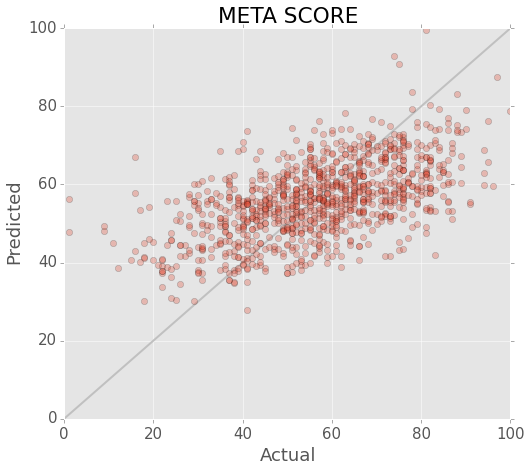

In [161]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict4 = results4.predict(X_test)

plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot([0, 100], [0, 100], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict4, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('META SCORE')

In [162]:
test_rsqr(y_test, predict4)

0.31686729570986905

In [163]:
basic2 = 'np.log(duration) + np.log(gross) + np.log(opening) + num_users + num_reviews'

formula = (dependent + basic2 + '+' + genres_str + '+' + highmeta_studios_str +
           '+' + pro_studios_str)

In [164]:
y5, X5 = dmatrices(formula, data=train, return_type='dataframe')

model5 = sm.OLS(y5, X5)
results5 = model5.fit()

results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     32.39
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          5.40e-242
Time:                        20:23:03   Log-Likelihood:                -11087.
No. Observations:                2745   AIC:                         2.228e+04
Df Residuals:                    2692   BIC:                         2.259e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                   -8.5527      9.898     -0.864      0.388       -27.961    10.856
np.log(duration)                            16.6621      2.116      7.875      0.000        12.513    20.811
np.log(gross)                                1.2351      0.241      5.134      0.000         0.763     1.707
np.log(opening)                             -2.7810      0.203    -13.698      0.000        -3.179    -2.383
num_users                                 5.806e-05   4.63e-06     12.537      0.000       4.9e-05  6.71e-05
num_reviews                                 -0.0011      0.001     -0.849      0.396        -0.004     0.001
Action                                      -4.9363      0.898     -5.498      0.000        -6.697    -3.176
Adventure                                   -0.7091      0.996     -0.712      0.477        -2.662     1.244
Animation                                    9.8780      2.068      4.776      0.000         5.823    13.933
Biography                                    2.2388      1.212      1.848      0.065        -0.137     4.614
Comedy                                      -1.8375      0.747     -2.460      0.014        -3.302    -0.373
Crime                                       -0.3784      0.795     -0.476      0.634        -1.938     1.181
Drama                                        6.6450      0.773      8.594      0.000         5.129     8.161
Family                                       1.4108      1.267      1.113      0.266        -1.074     3.895
Fantasy                                     -3.3062      1.178     -2.807      0.005        -5.616    -0.997
History                                      1.1581      1.681      0.689      0.491        -2.138     4.454
Horror                                      -5.5593      1.241     -4.481      0.000        -7.992    -3.127
Music                                       -0.7932      1.357     -0.585      0.559        -3.454     1.867
Musical                                     -2.9366      2.200     -1.335      0.182        -7.251     1.378
Mystery                                     -3.1627      1.024     -3.090      0.002        -5.170    -1.156
Romance                                     -2.5637      0.722     -3.551      0.000        -3.979    -1.148
Sci_Fi                                      -2.6960      1.345     -2.004      0.045        -5.334    -0.058
Sport                                       -2.1909      1.584     -1.383      0.167        -5.297     0.916
Thriller                                    -0.9492      0.896     -1.059      0.290        -2.707     0.808
War                                          2.1694      1.789      1.213      0.225        -1.338     5.677
Western                        

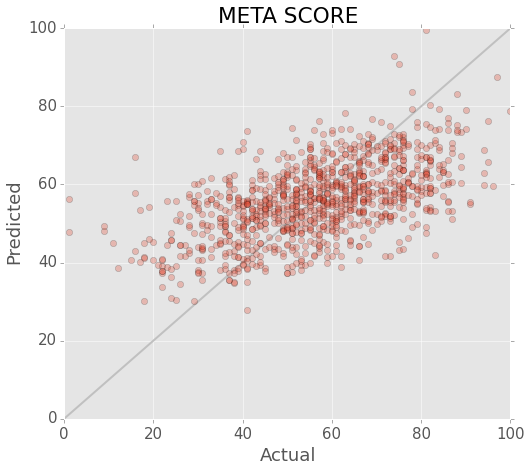

In [165]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict5 = results5.predict(X_test)

plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot([0, 100], [0, 100], color='#C0C0C0', linestyle='-', linewidth=2)

plt.plot(y_test, predict4, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('META SCORE')

In [166]:
test_rsqr(y_test, predict5)

0.35927445292857785

In [167]:
basic3 = 'np.log(duration) + np.log(gross) + np.log(opening) + rating + num_users + num_reviews'

formula = (dependent + basic3 + '+' + genres_str + '+' + highmeta_studios_str +
           '+' + pro_studios_str)

In [168]:
y6, X6 = dmatrices(formula, data=train, return_type='dataframe')

model6 = sm.OLS(y6, X6)
results6 = model6.fit()

results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     32.21
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          6.33e-258
Time:                        20:23:07   Log-Likelihood:                -11039.
No. Observations:                2745   AIC:                         2.219e+04
Df Residuals:                    2687   BIC:                         2.254e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                  -10.1208     10.099     -1.002      0.316       -29.924     9.683
rating[T.NC-17]                              3.4495      5.369      0.642      0.521        -7.079    13.978
rating[T.PG]                                -1.5100      2.667     -0.566      0.571        -6.740     3.721
rating[T.PG-13]                             -2.0615      2.837     -0.727      0.467        -7.624     3.501
rating[T.R]                                  1.3584      2.847      0.477      0.633        -4.225     6.942
rating[T.UNRATED]                            9.2479      2.994      3.089      0.002         3.378    15.118
np.log(duration)                            14.6735      2.098      6.993      0.000        10.559    18.788
np.log(gross)                                1.7673      0.243      7.270      0.000         1.291     2.244
np.log(opening)                             -2.6597      0.200    -13.269      0.000        -3.053    -2.267
num_users                                 5.585e-05   4.57e-06     12.229      0.000      4.69e-05  6.48e-05
num_reviews                                 -0.0011      0.001     -0.869      0.385        -0.004     0.001
Action                                      -4.7098      0.885     -5.322      0.000        -6.445    -2.974
Adventure                                   -0.0079      0.996     -0.008      0.994        -1.960     1.944
Animation                                    9.9134      2.138      4.636      0.000         5.720    14.106
Biography                                    2.3053      1.194      1.931      0.054        -0.036     4.646
Comedy                                      -1.5518      0.737     -2.106      0.035        -2.996    -0.107
Crime                                       -0.5836      0.793     -0.736      0.462        -2.138     0.971
Drama                                        6.7849      0.762      8.908      0.000         5.291     8.278
Family                                       1.6797      1.482      1.133      0.257        -1.226     4.586
Fantasy                                     -2.8785      1.163     -2.476      0.013        -5.158    -0.599
History                                      1.2731      1.654      0.770      0.442        -1.971     4.517
Horror                                      -6.0024      1.232     -4.871      0.000        -8.419    -3.586
Music                                       -0.2985      1.336     -0.223      0.823        -2.918     2.321
Musical                                     -2.7628      2.171     -1.272      0.203        -7.020     1.495
Mystery                                     -3.1374      1.007     -3.115      0.002        -5.112    -1.162
Romance                        

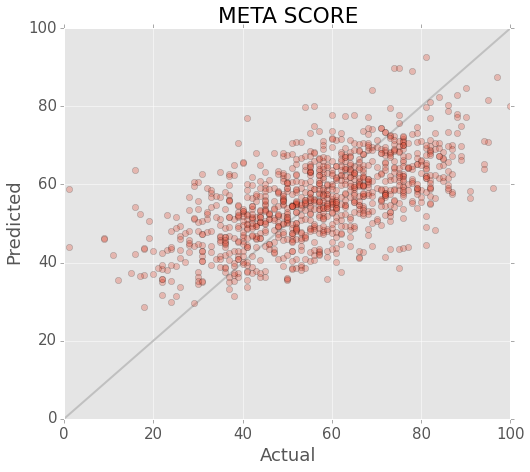

In [177]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict6 = results6.predict(X_test)

plt.figure(figsize = (8,7))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot([0, 100], [0, 100], color='#C0C0C0', linestyle='-', linewidth=2)

matplotlib.rcParams.update({'font.size': 15})

plt.plot(y_test, predict6, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('META SCORE')

In [182]:
len(y_test.metacritic), len(predict6)

(1033, 1033)

In [183]:
import scipy.stats as stats

measurements = np.var(y_test.metacritic.values-predict6)
stats.probplot(measurements, dist="norm", plot=plt)
plt.show()

TypeError: len() of unsized object

In [170]:
test_rsqr(y_test, predict6)

0.38514242274021404

In [171]:
train.loc[train['user_score'].idxmax()]

country                                                USA
director                                 Christopher_Nolan
duration                                               152
gross                                            534858444
language                                           English
lead                                        Christian Bale
metacritic                                              82
num_reviews                                           4323
num_users                                          1458287
opening                                       1.584115e+08
rating                                               PG-13
release                                2008-07-18 00:00:00
studio                                        Warner Bros.
user_score                                               9
month                                                    7
Action                                                   1
Adventure                                               

In [172]:
model5 = ElasticNet(1.0, l1_ratio = 0.5)
results5 = model5.fit(X4, y4)

In [173]:
formula

'metacritic ~ np.log(duration) + np.log(gross) + np.log(opening) + rating + num_users + num_reviews+Action + Adventure + Animation + Biography + Comedy + Crime + Drama + Family + Fantasy + History + Horror + Music + Musical + Mystery + Romance + Sci_Fi + Sport + Thriller + War + Western+X_focus_features + X_bbc_films + X_canal + X_fox_searchlight_pictures + X_united_artists + X_miramax + X_dreamworks_skg + X_europacorp + X_columbia_pictures + X_universal_pictures + X_walt_disney_pictures + X_paramount_pictures + X_millennium_films + X_warner_bros + X_alcon_entertainment + X_weinstein_company_the + X_touchstone_pictures + X_lions_gate_films + X_new_line_cinema + X_columbia_pictures_corporation+X_universal_pictures + X_warner_bros + X_paramount_pictures + X_twentieth_century_fox_film_corporation + X_new_line_cinema + X_columbia_pictures_corporation + X_touchstone_pictures + X_dreamworks_skg + X_columbia_pictures + X_metrogoldwynmayer_mgm + X_walt_disney_pictures + X_miramax + X_fox_searc

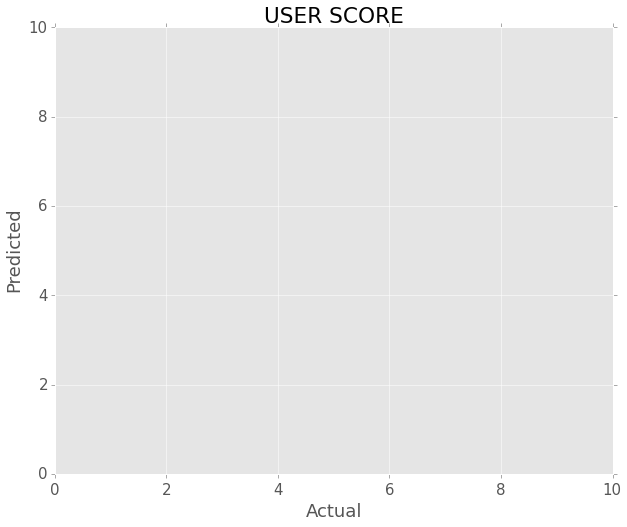

In [174]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict5 = results5.predict(X_test)

plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,10,0,10))

plt.plot(y_test, predict5, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('USER SCORE')

In [175]:
train['user_score'].mean()

6.41719489981785